In [1]:
# import the dataset on DataScience Jobs from Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brsahan/data-science-job")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\diana\.cache\kagglehub\datasets\brsahan\data-science-job\versions\1


In [2]:
# read CSV file
import csv 
import pandas as pd
df = pd.read_csv('data_science_job.csv')

In [3]:
#check where python is looking for the file
import os
print(os.getcwd())

C:\Users\diana\Documents\Uni_Luzern\Master\4. Semester\Unsupervised Machine Learning


In [3]:
df.describe(include='all')

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,5000.00000,5000,4500,4500,5000.000000,5000.000000,5000,4500,5000,5000,5000,4500
unique,NaN,15,4,5,NaN,NaN,7,4,4,3,7,3
top,NaN,Data Engineer in office,Data Science,EUR,NaN,NaN,JP,SE,PT,Hybrid,UK,S
freq,NaN,372,1173,962,NaN,NaN,783,1154,1268,1721,789,1519
mean,2020.97680,NaN,NaN,NaN,102046.307200,114076.995800,NaN,NaN,NaN,NaN,NaN,NaN
std,0.81951,NaN,NaN,NaN,70853.626492,49113.807687,NaN,NaN,NaN,NaN,NaN,NaN
min,2020.00000,NaN,NaN,NaN,-198754.000000,30016.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2020.00000,NaN,NaN,NaN,64295.500000,71343.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2021.00000,NaN,NaN,NaN,110636.000000,114167.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022.00000,NaN,NaN,NaN,153104.750000,156665.750000,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.info())
print(df['job_title'].nunique())
print(df['job_title'].value_counts())
print(len(df))

# there are 15 unique 'job titles'
# there are no null values
# the dataset contains 12 columns
# in total it has 5000 entries/ rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB
None
15
job_title
Data Engineer  in office                372
Data Engineer                           355
Statistician                            354
Data Scientist     

In [5]:
NA_jobTitle = df['job_title'].isna().sum()
NA_any = df.isna().any().any() 

print(NA_jobTitle)
print(NA_any)
#no NA's in the column 'job title'great

0
True


In [15]:
df.isna().sum()
# here I see that there are 500 missing values in 'job_category', 'salary_currency', 'experience_level' and 'company_size'

work_year               0
job_title               0
job_category            0
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64

In [7]:
# for my project I will use to do predictions the columns job titles and job categories, so let's fill these missing values with No description provided
# the problem is, when removing the values with df.dropna() the whole rows are removed and I don't see that as an effective step for my project
df['job_category'] = df['job_category'].fillna('No description provided')

In [8]:
df.head(20)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S
5,2020,Machine Learning Engineer,Engineering,JPY,36544,68280,CN,MI,FT,Hybrid,DE,M
6,2022,Data Analyst in office,Data Science,JPY,178404,105324,DE,EX,PT,Remote,DE,L
7,2021,Data Scientist (Remote),ML/AI,JPY,187908,90706,UK,EX,CT,Remote,JP,M
8,2022,Data Analyst,No description provided,NaN,-44388,171043,UK,NaN,FL,In-person,DE,NaN
9,2022,Statistician (Remote),Engineering,us dolars,31694,73408,DE,EN,CT,Remote,US,S


In [18]:
# I have seen that some job categories are written short. So I will write them with the long version in a new dataframe
df_jobs = df.copy()  
df_jobs['job_category'] = df_jobs['job_category'].str.replace('ML/AI', 'Machine Learning/ Artificial Intelligence')


In [19]:
df_jobs.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),Machine Learning/ Artificial Intelligence,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,Machine Learning/ Artificial Intelligence,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Machine Learning/ Artificial Intelligence,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


In [20]:
# as a last step of cleaning the data let's write the text in lower case. To be sure that every word is "understood" right
df_jobs['job_title'] = df_jobs['job_title'].str.lower().str.strip()
df_jobs['job_category'] = df_jobs['job_category'].str.lower().str.strip()


In [21]:
# now I use TF-IDF to vectorize job titles and job categories
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_jobs['job_title'])


In [22]:
# now I'll use the elbow method and silhouette score to find optimal numbers of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
silhouette = []
K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))




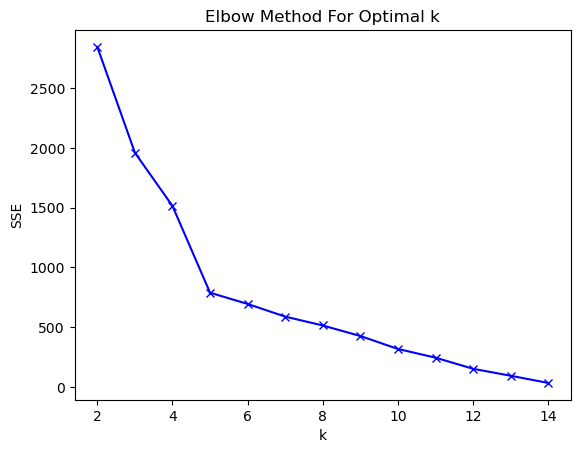

In [94]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns
# SSE (Elbow method)
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.savefig('Elbow Method For Optimal k.png', bbox_inches='tight')

plt.show()
# 5 seems to be a good number for clustering (k-means). The optimal K value is the point at which the graph forms an elbow.

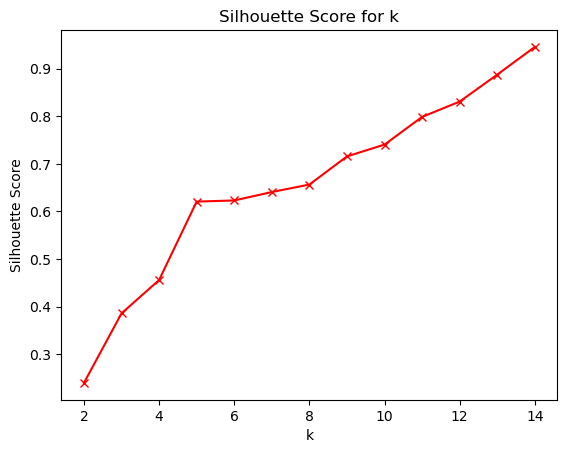

In [93]:
# Plot Silhouette Score
plt.plot(K, silhouette, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for k')
plt.savefig('Silhouette Score for k.png', bbox_inches='tight')

plt.show()
# in this Score I evaluate the quality of clustering results. There is a significant jump from 4 to 5. 
# the k-means optimal number will be 5

In [24]:
# apply the significant k-mean 
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
#df_jobs['cluster'] = kmeans.fit_predict(X)
label = kmeans.fit_predict(X)
print(len(label))

5000


In [52]:
# now let's check the job titles per clusters
for i in range(best_k):
    print(f"\nCluster {i} top job titles:")
    print(df_jobs[label == i]['job_title'].value_counts(sort=True))



Cluster 0 top job titles:
job_title
machine learning engineer  in office    331
machine learning engineer  (remote)     327
machine learning engineer               306
Name: count, dtype: int64

Cluster 1 top job titles:
job_title
data scientist               353
data scientist  in office    330
data scientist  (remote)     310
Name: count, dtype: int64

Cluster 2 top job titles:
job_title
statistician               354
statistician  (remote)     323
statistician  in office    317
Name: count, dtype: int64

Cluster 3 top job titles:
job_title
data analyst  in office    339
data analyst  (remote)     336
data analyst               309
Name: count, dtype: int64

Cluster 4 top job titles:
job_title
data engineer  in office    372
data engineer               355
data engineer  (remote)     338
Name: count, dtype: int64


In [91]:
# let's visualize the clusters with a nice histogram
# first I will create a new dataframe of the loop before

all_cluster_top_job_titles = []
for i in range(best_k):
    cluster_job_counts = df_jobs[label == i]['job_title'].value_counts(sort=True).reset_index() #gives a series and convert to df
    cluster_job_counts.columns = ['job_title', 'count']

    # Add a 'cluster' column to identify which cluster these counts belong to
    cluster_job_counts['cluster'] = i

    # Append this DataFrame to our list
    all_cluster_top_job_titles.append(cluster_job_counts)

# Concatenate all individual cluster DataFrames into one master DataFrame
df_job_cluster = pd.concat(all_cluster_top_job_titles, ignore_index=True)
print(df_job_cluster)

                               job_title  count  cluster
0   machine learning engineer  in office    331        0
1    machine learning engineer  (remote)    327        0
2              machine learning engineer    306        0
3                         data scientist    353        1
4              data scientist  in office    330        1
5               data scientist  (remote)    310        1
6                           statistician    354        2
7                 statistician  (remote)    323        2
8                statistician  in office    317        2
9                data analyst  in office    339        3
10                data analyst  (remote)    336        3
11                          data analyst    309        3
12              data engineer  in office    372        4
13                         data engineer    355        4
14               data engineer  (remote)    338        4


                  base_title  count
4  machine learning engineer    964
3               data analyst    984
2             data scientist    993
1               statistician    994
0              data engineer   1065


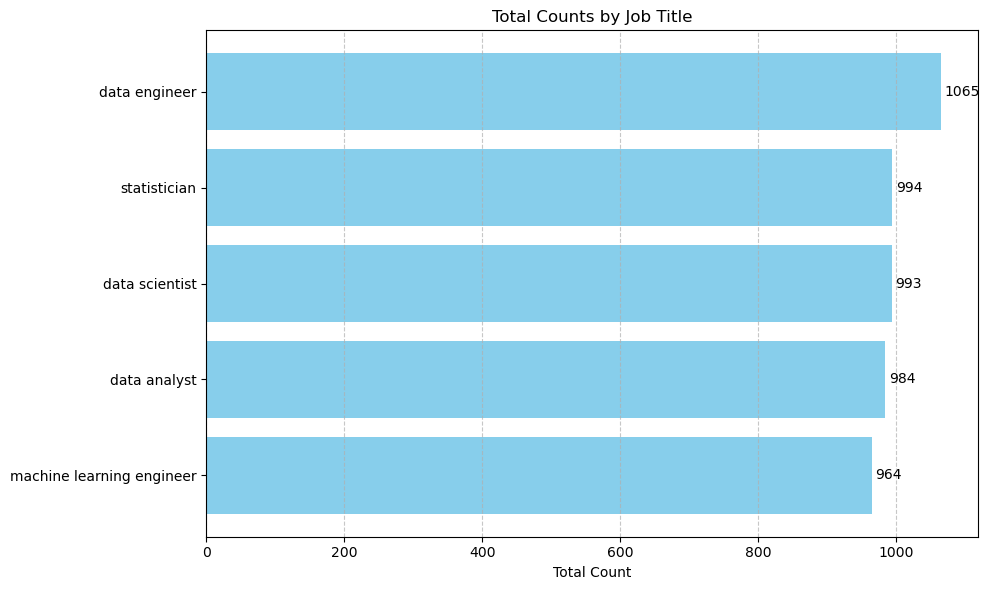

In [92]:
# now I have a dataframe with 3 columns: job_title, count and cluster
# what I have got are 5 clusters grouped by job title. I already see the division between the jobs. What stands out for me is that within 
# the cluster itself, the job titles are sorted by title, remote, and office. What I can actually do is combine these sorts, since the job 
# itself is the same.
# Clean job titles to remove 'in office' and '(remote)'
df_job_cluster['base_title'] = df_job_cluster['job_title'] \
    .str.replace(r'\s*\(remote\)|\s*in office', '', regex=True) \
    .str.strip()

df_job_cluster = df_job_cluster.groupby('base_title', as_index=False)['count'].sum()

df_job_cluster = df_job_cluster.sort_values(by='count', ascending=False).reset_index(drop=True)
df_job_cluster = df_job_cluster[::-1]
print(df_job_cluster)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_job_cluster['base_title'], df_job_cluster['count'], color='skyblue')
plt.xlabel('Total Count')
plt.title('Total Counts by Job Title')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add values to bars
for index, value in enumerate(df_job_cluster['count']):
    plt.text(value + 5, index, str(value), va='center')

plt.tight_layout()

plt.savefig('Total Counts by Job Title.png', bbox_inches='tight')

plt.show()





(5000, 2)


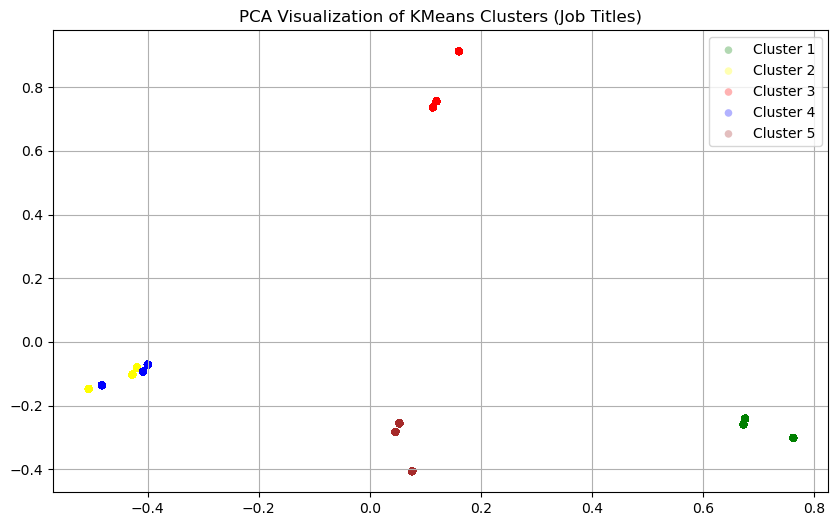

In [95]:
# let's plot it in a scatterplot of my clustering. First I wanted to plot the most frequent job titles and then I got
# an error: "setting an array element with a sequence." I then figured out that python is trying to plot an array which is 2 
# dimensional but I am giving a sequence. So first let's break it down to 2 dimensionality
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X.toarray())  # .toarray() is needed if X is sparse
print(X_2d.shape) 

# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['green', 'yellow', 'red', 'blue', 'brown', 'orange']
for i in range(best_k):
    plt.scatter(
        X_2d[label == i, 0],
        X_2d[label == i, 1],
        s=30,                     # Small dots
        c=colors[i % len(colors)],
        label=f'Cluster {i+1}',
        alpha=0.3,
        edgecolors='none'
    )

plt.title('PCA Visualization of KMeans Clusters (Job Titles)')
plt.legend()
plt.grid(True)
plt.savefig('PCA Visualization of KMeans Clusters.png', bbox_inches='tight')

plt.show()

In [136]:
import numpy as np

for i in range(best_k):
    print(f"Cluster {i}: {np.sum(label == i)} points")

# At first, I was confused because I saw only 3 points in each cluster in the PCA plot. I thought there should be way more points, since my dataset 
# has 5,000 job titles. But then I realized something: I only have 15 unique job title variations. So even though the dataset is large, 
# each of those 15 unique titles is shown as one point in the PCA plot. Since I grouped those into 5 clusters, it makes sense that 
# the plot shows 3 points per cluster. The rest of the entries are just repeated versions of those 15 titles.

Cluster 0: 964 points
Cluster 1: 993 points
Cluster 2: 994 points
Cluster 3: 984 points
Cluster 4: 1065 points


In [ ]:
# My clustering method with K-means was not promising enough. Looking at the data summary again I want to go ahead with another clustering
# chance. For the second try I will cluster the salary in usd and analyze how the algorithm will cluster the salary and then compare the 
# job salary categories with the one from switzerland. 